In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import data


In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/CS116/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Split data

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

Predict


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

regressor2 = RandomForestRegressor()
regressor2.fit(X_train, y_train)

regressor3 = SVR(kernel='linear')
regressor3.fit(X_train, y_train)

regressor4 = SVR(kernel='rbf')
regressor4.fit(X_train, y_train)

regressor5 = SVR(kernel='poly')
regressor5.fit(X_train, y_train)


SVR(kernel='poly')

In [73]:
y_pred1 = regressor1.predict(X_test)
y_pred2 = regressor2.predict(X_test)
y_pred3 = regressor3.predict(X_test)
y_pred4 = regressor4.predict(X_test)
y_pred5 = regressor5.predict(X_test)

In [74]:
y_result1= regressor1.predict(X_val)
y_result2= regressor2.predict(X_val)
y_result3= regressor3.predict(X_val)
y_result4= regressor4.predict(X_val)
y_result5= regressor5.predict(X_val)

Loss function

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
loss_test1 = mean_squared_error(y_test,y_pred1)
loss_test1

31518783.133549973

In [77]:
loss_test2 = mean_squared_error(y_test,y_pred2)
loss_test2

78610524.18632227

In [78]:
loss_test3 = mean_squared_error(y_test,y_pred3)
loss_test3

1194063209.8721666

In [79]:
loss_test4 = mean_squared_error(y_test,y_pred4)
loss_test4

1200586784.7980175

In [80]:
loss_test5 = mean_squared_error(y_test,y_pred5)
loss_test5

893841859.0776677

In [81]:
loss_val1 = mean_squared_error(y_val,y_result1)
loss_val1

35146930.42543851

In [82]:
loss_val2 = mean_squared_error(y_val,y_result2)
loss_val2

66434594.569342904

In [83]:
loss_val3 = mean_squared_error(y_val,y_result3)
loss_val3

626714090.5316571

In [84]:
loss_val4 = mean_squared_error(y_val,y_result4)
loss_val4

630474935.1961511

In [85]:
loss_val5 = mean_squared_error(y_val,y_result5)
loss_val5

465885032.5426184

Bảng so sánh loss value xét trên data 'Salary_Data.csv'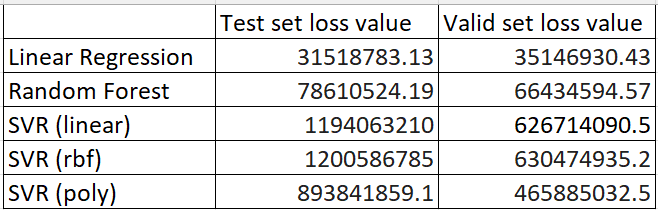

Nhận xét: Có thể thấy ở bộ dữ liệu này giá trị hàm loss của các mô hình khá cao, tuy nhiên kết quả đường boundary trả về vẫn khá tốt. Lý do là bởi vì dữ liệu được đưa vào khá ít dẫn đến việc tập train bị thiếu dữ liệu để học, cũng như tập test quá ít điểm nên việc kẻ đường line chia các khu dữ liệu khá dễ dàng.